# EDA


## Key Goals of EDA

1. Understand feature distributions and relationships.
2. Identify key variables influencing survival.
3. Generate insights for feature engineering and model building.

## EDA PLAN

1. Data Overview

2. Univariate Analysis (Single Variable)

3. Bivariate Analysis (Two Variables)

4. Feature Engineering Insights

5. Advanced Visualizations

6. Hypothesis Testing


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic

### Data Overview
* Load the dataset and check the first few rows (df.head()).
* Check data types, missing values, and summary statistics (df.info(), df.describe()).
* Verify unique values in categorical columns (df.nunique()).

In [ ]:
train_df = pd.read_csv("../data/cleaned/cleaned_training_simple.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

I want column passengerId to be of type 'object'

In [6]:
train_df['PassengerId'] = train_df['PassengerId'].astype(str)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Around 38% of passengers survived.
* Most passengers were in lower classes. Majority were in 3rd class.
* Average passenger was 29 years old. Most were young adults (20s-30s).
* Most people traveled alone or with one person.
* Most passengers had no parents/children onboard.
* Some passengers had free tickets. Most fares were low.


### Univariate Analysis (Single Variable)
1. Numerical Features:
 * Plot distributions using histograms (sns.histplot()) or KDE plots.
 * Check skewness (df.skew()) and consider transformations if needed.

2. Categorical Features:

 * Bar plots for Pclass, Sex, Embarked, etc.
 * Count plots using sns.countplot() to see class distribution.

#### Numerical Features

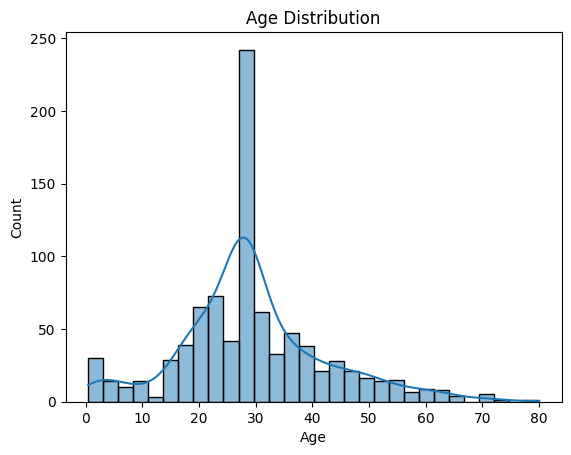

In [9]:
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

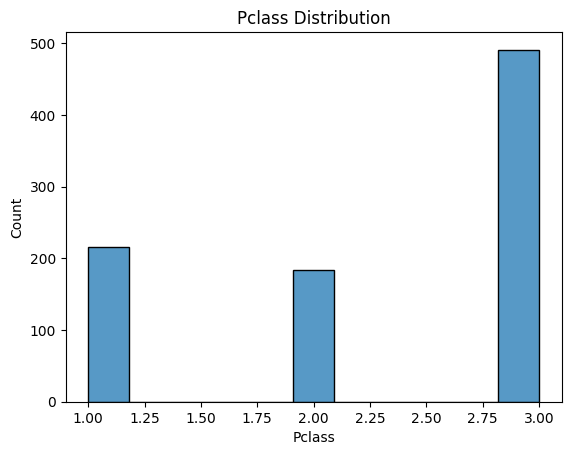

In [10]:
sns.histplot(train_df['Pclass'])
plt.title("Pclass Distribution")
plt.show()

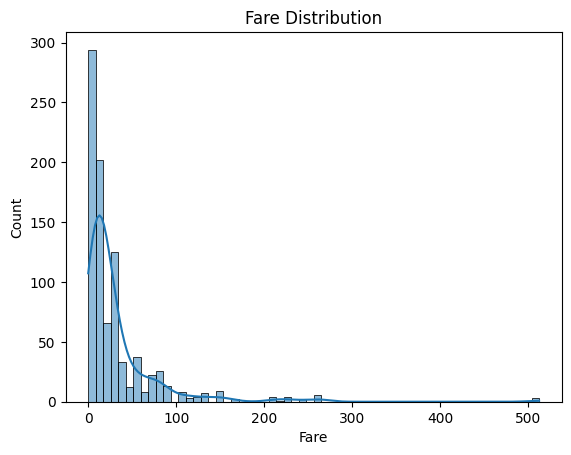

In [11]:
sns.histplot(train_df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

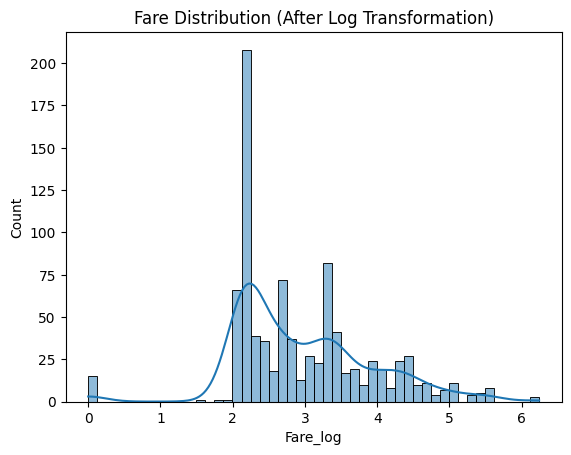

In [12]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])  # log1p to handle zero values
sns.histplot(train_df['Fare_log'], bins=50, kde=True)
plt.title("Fare Distribution (After Log Transformation)")
plt.show()

In [13]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_log'],
      dtype='object')

#### Categorical Features

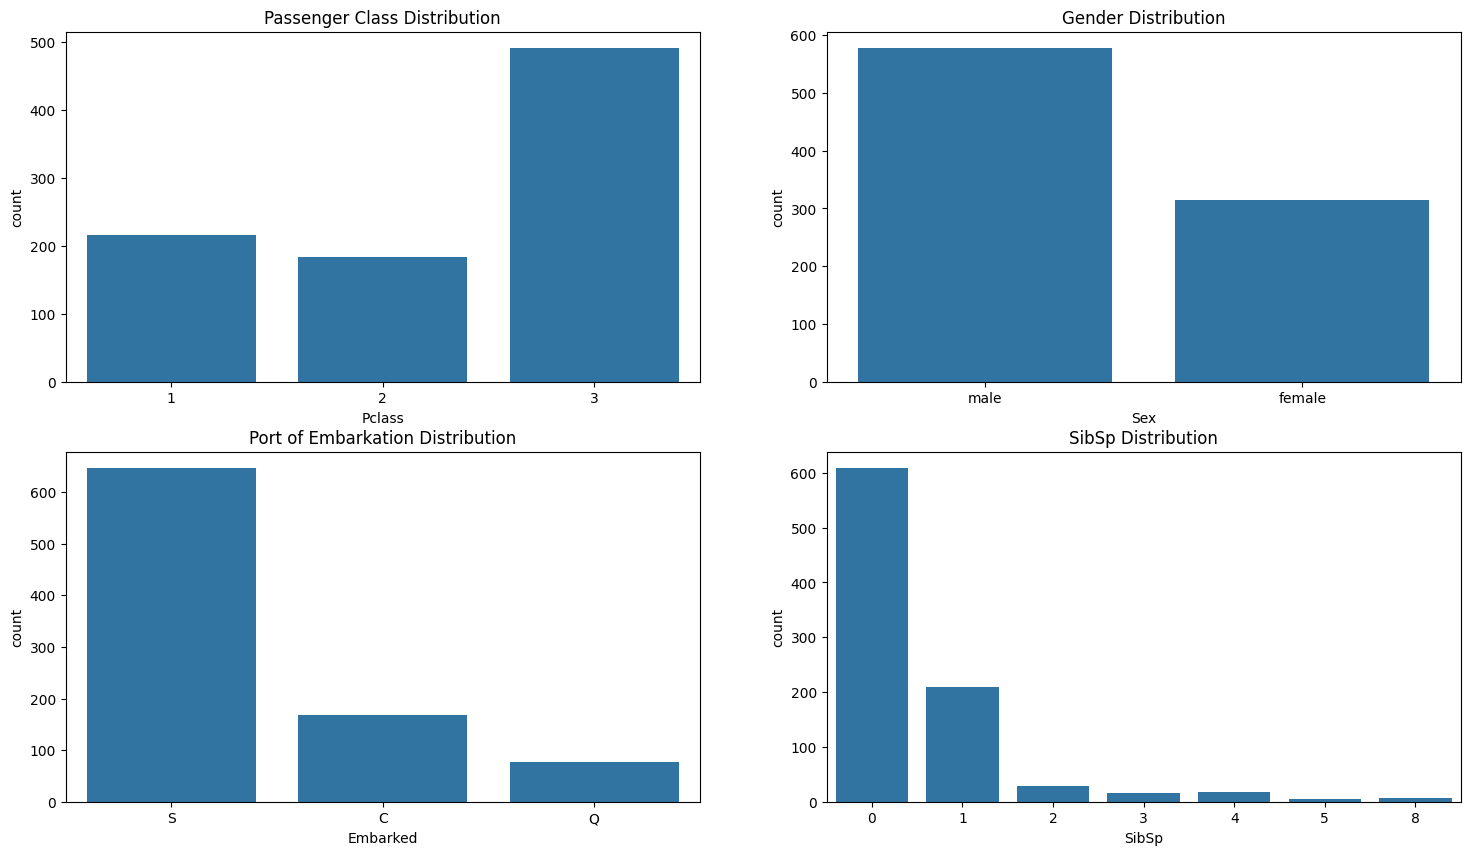

In [14]:
# Count plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(x='Pclass', data=train_df, ax=axes[0][0])
axes[0][0].set_title("Passenger Class Distribution")

sns.countplot(x='Sex', data=train_df, ax=axes[0][1])
axes[0][1].set_title("Gender Distribution")

sns.countplot(x='Embarked', data=train_df, ax=axes[1][0])
axes[1][0].set_title("Port of Embarkation Distribution")

sns.countplot(x='SibSp', data=train_df, ax=axes[1][1])
axes[1][1].set_title("SibSp Distribution")

plt.show()

### Bivariate Analysis (Two Variables)
1. Survival vs Features:
* Compare survival rates across different features (Pclass, Sex, Fare, Deck).
* Box plots for Fare vs Survived (sns.boxplot(x='Survived', y='Fare', data=df)).
* Stacked bar plots to analyze categorical relationships.

2. Correlation Analysis:
* Compute correlation matrix (df.corr()) to check relationships.
* Heatmap of correlations (sns.heatmap(df.corr(), annot=True, cmap='coolwarm')).

Text(0.5, 1.0, 'Parch vs Survived')

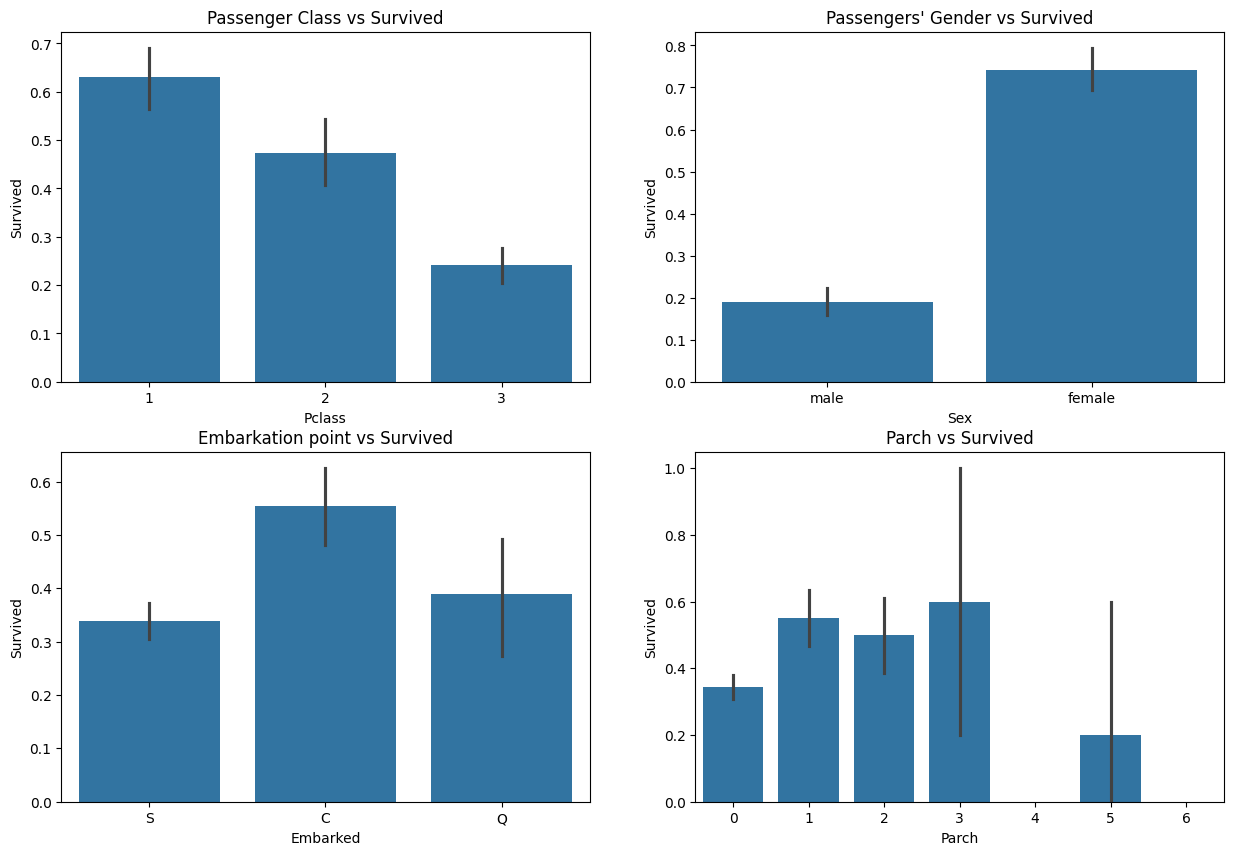

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[0][0])
axes[0][0].set_title("Passenger Class vs Survived")

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0][1])
axes[0][1].set_title("Passengers' Gender vs Survived")

sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axes[1][0])
axes[1][0].set_title("Embarkation point vs Survived")

sns.barplot(x='Parch', y='Survived', data=train_df, ax=axes[1][1])
axes[1][1].set_title("Parch vs Survived")


Text(0.5, 1.0, "Passengers' Fare vs Survived")

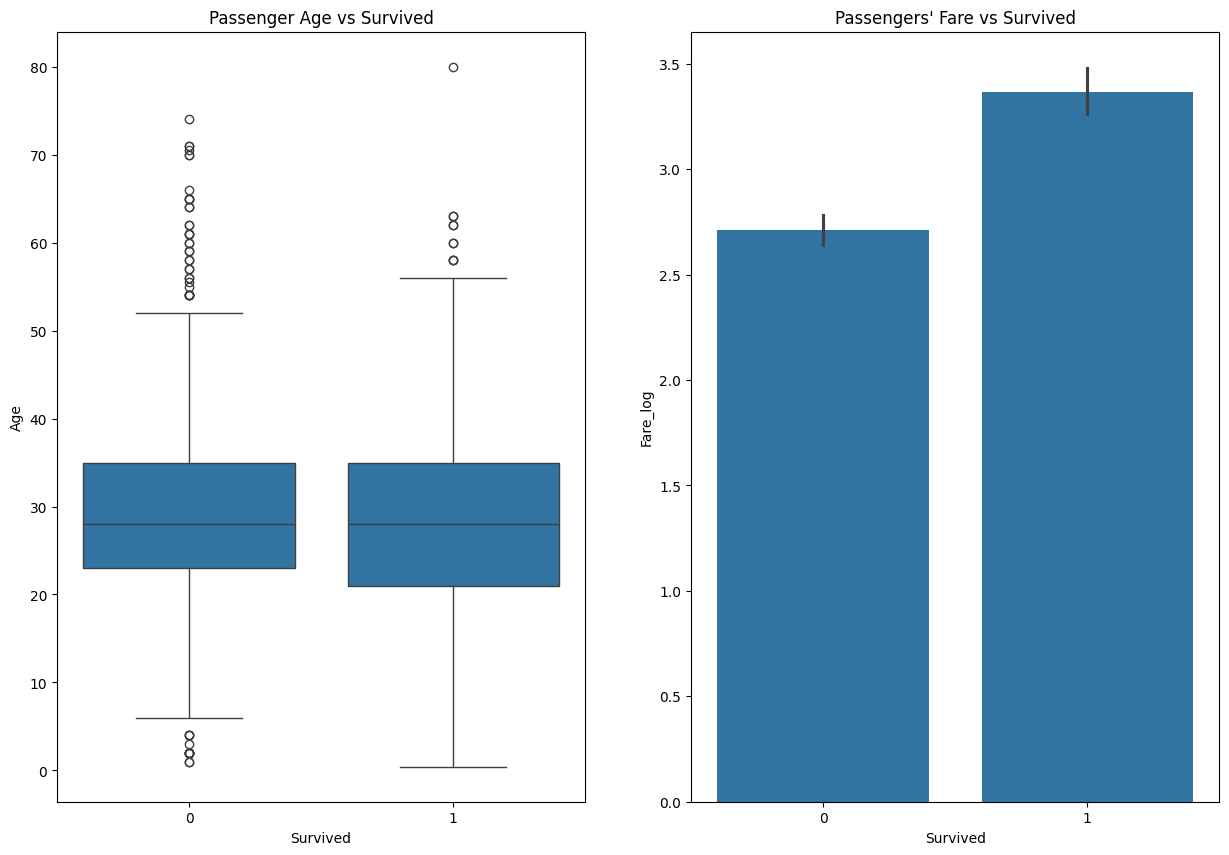

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.boxplot(x='Survived', y='Age', data=train_df, ax=axes[0])
axes[0].set_title("Passenger Age vs Survived")

sns.barplot(x='Survived', y='Fare_log', data=train_df, ax=axes[1])
axes[1].set_title("Passengers' Fare vs Survived")

Correlation analysis

In [17]:
train_df.select_dtypes(include=['number']).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.329862
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.661022
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.110964
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.318528
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.332186
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.787543
Fare_log,0.329862,-0.661022,0.110964,0.318528,0.332186,0.787543,1.000000


<Axes: >

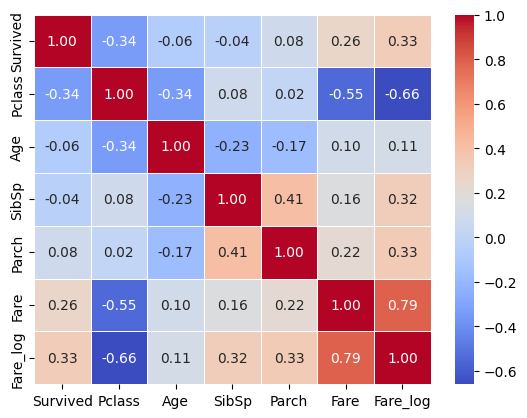

In [18]:
sns.heatmap(train_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

<Axes: >

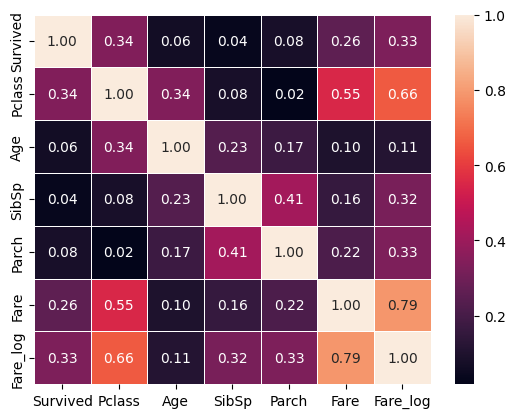

In [19]:
sns.heatmap(train_df.select_dtypes(include=['number']).corr().abs(), annot=True, fmt=".2f", linewidths=0.5)

### Feature Engineering Insights

1. Does Fare need binning? (Low, Medium, High)

Fare values vary widely (0 to 512), and we saw earlier that it's skewed.
Binning into Low, Medium, High could help capture survival patterns better.


In [20]:
train_df['Fare_Binned'] = pd.cut(train_df['Fare'], bins=[0, 10, 50, 600], labels=['Low', 'Medium', 'High'])

2. Group Age into categories (Child, Teen, Adult, Senior).

Children were more likely to be saved (women & children first). Seniors might have had a lower survival rate. Binning Helps model understand age patterns better.

In [21]:
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

3. Size Feature: Combine SibSp and Parch into a new feature.

Solo travelers may have had a harder time surviving. 
Large families might have struggled together. 
Creates a new perspective beyond just sibling/parent counts.

In [22]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Fare_log     891 non-null    float64 
 12  Fare_Binned  876 non-null    category
 13  Age_Group    891 non-null    category
 14  Family_Size  891 non-null    int64   
dtypes: category(2), float64(3), int64(5), object(5)
memory usage: 92.7+ KB


### Plotting again

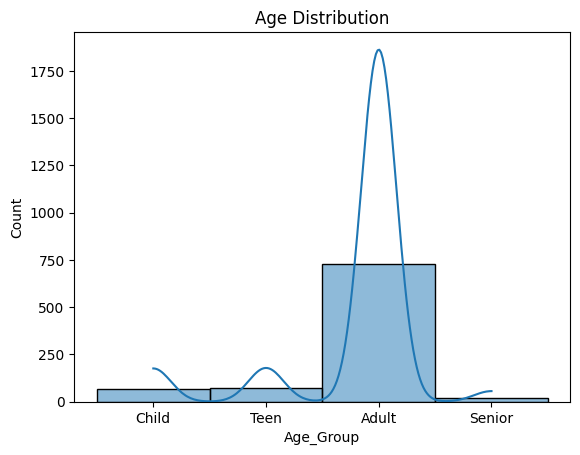

In [29]:
sns.histplot(train_df['Age_Group'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

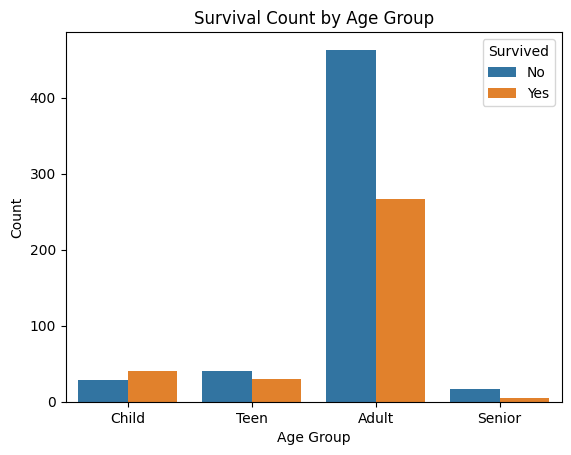

In [30]:
sns.countplot(x='Age_Group', hue='Survived', data=train_df)
plt.title("Survival Count by Age Group")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Children had a higher survival rate compared to other age groups. Seniors had the lowest survival rate. Age group is an important factor in survival.

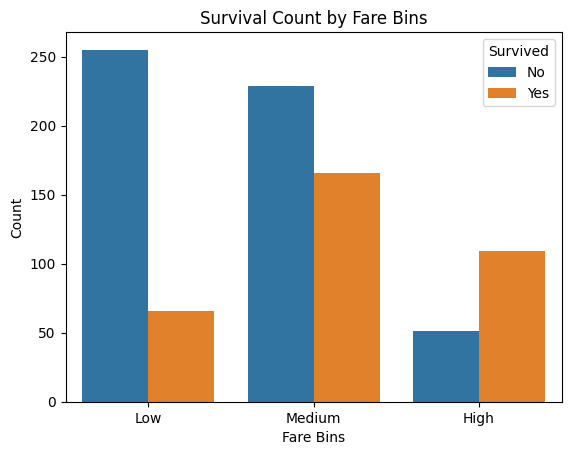

In [31]:
sns.countplot(x='Fare_Binned', hue='Survived', data=train_df)
plt.title("Survival Count by Fare Bins")
plt.ylabel("Count")
plt.xlabel("Fare Bins")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Passengers who paid higher fares had a better chance of survival. Most non-survivors were in the low fare group, indicating a link between fare (and thus class) and survival.

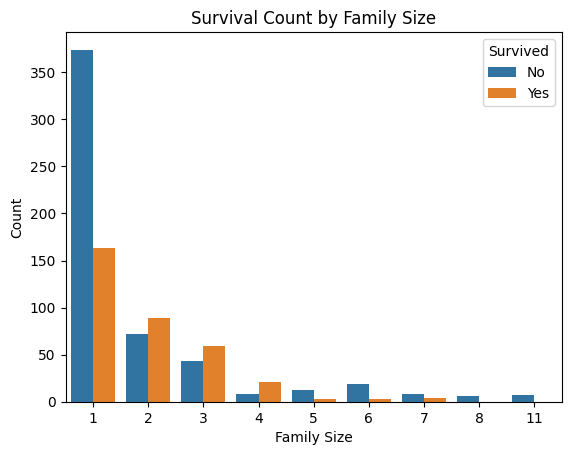

In [32]:
sns.countplot(x='Family_Size', hue='Survived', data=train_df)
plt.title("Survival Count by Family Size")
plt.ylabel("Count")
plt.xlabel("Family Size")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

Passengers with small families (2-4 members) had higher survival rates. Solo travelers and those with large families had lower survival rates, suggesting that traveling with a small group was advantageous.

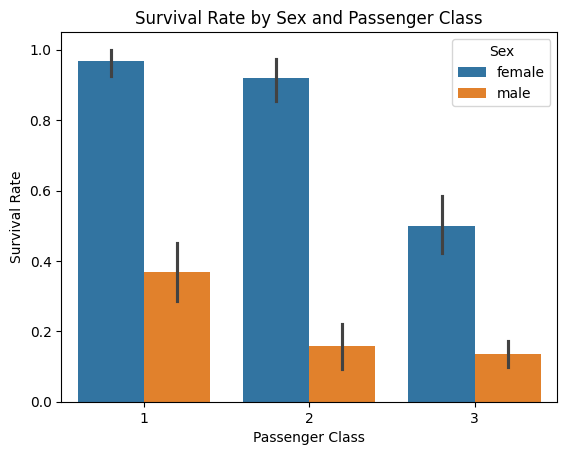

In [33]:
# Grouped barplot: Survival rate by Sex and Pclass
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)
plt.title("Survival Rate by Sex and Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

Females in 1st and 2nd class had the highest survival rates, while males in 3rd class had the lowest. This shows that both gender and passenger class strongly influenced survival chances.

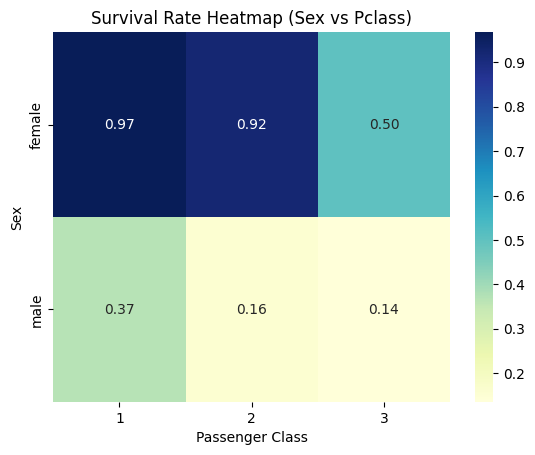

In [34]:
# Create a pivot table
pivot = train_df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Survival Rate Heatmap (Sex vs Pclass)")
plt.ylabel("Sex")
plt.xlabel("Passenger Class")
plt.show()

- The highest survival rate is observed for females in 1st class.
- Males in all classes, especially 3rd, had much lower survival rates.
- This confirms that both gender and class were strong predictors of survival.

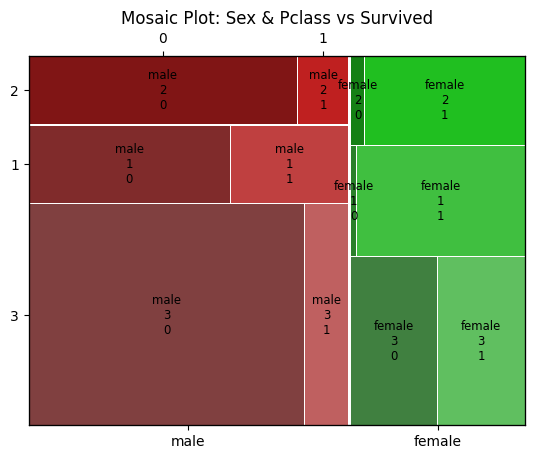

In [35]:
# Mosaic plot for Sex, Pclass, and Survived
mosaic(train_df, ['Sex', 'Pclass', 'Survived'])
plt.title("Mosaic Plot: Sex & Pclass vs Survived")
plt.show()

- The plot visually reinforces that females and higher classes had a higher proportion of survivors.
- The largest block of non-survivors is among males in 3rd class.
- The plot highlights the interaction effect between Sex and Pclass on survival.

### Now, check correlations once again

<Axes: >

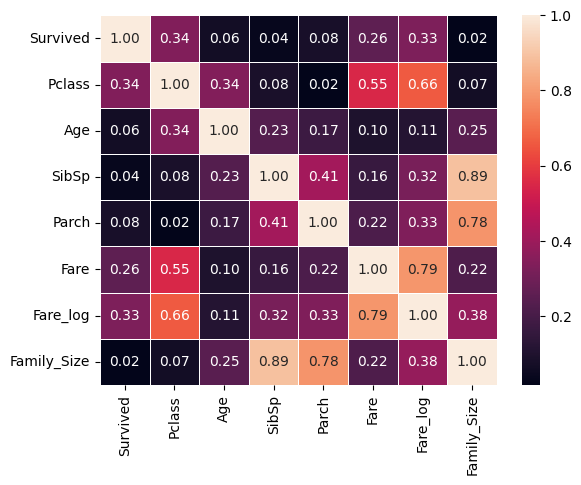

In [24]:
sns.heatmap(train_df.select_dtypes(include=['number']).corr().abs(), annot=True, fmt=".2f", linewidths=0.5)

Survival is most strongly correlated with Sex, Pclass, and Fare. Other features show weaker correlations. This supports focusing on these variables for predictive modeling.

### Advanced Visualizations
1. Pairplot for numerical features: (sns.pairplot(df, hue='Survived')).
2. Violin plots & Swarm plots for better insights.
3. Survival rate by Deck (if Deck is created from Cabin).

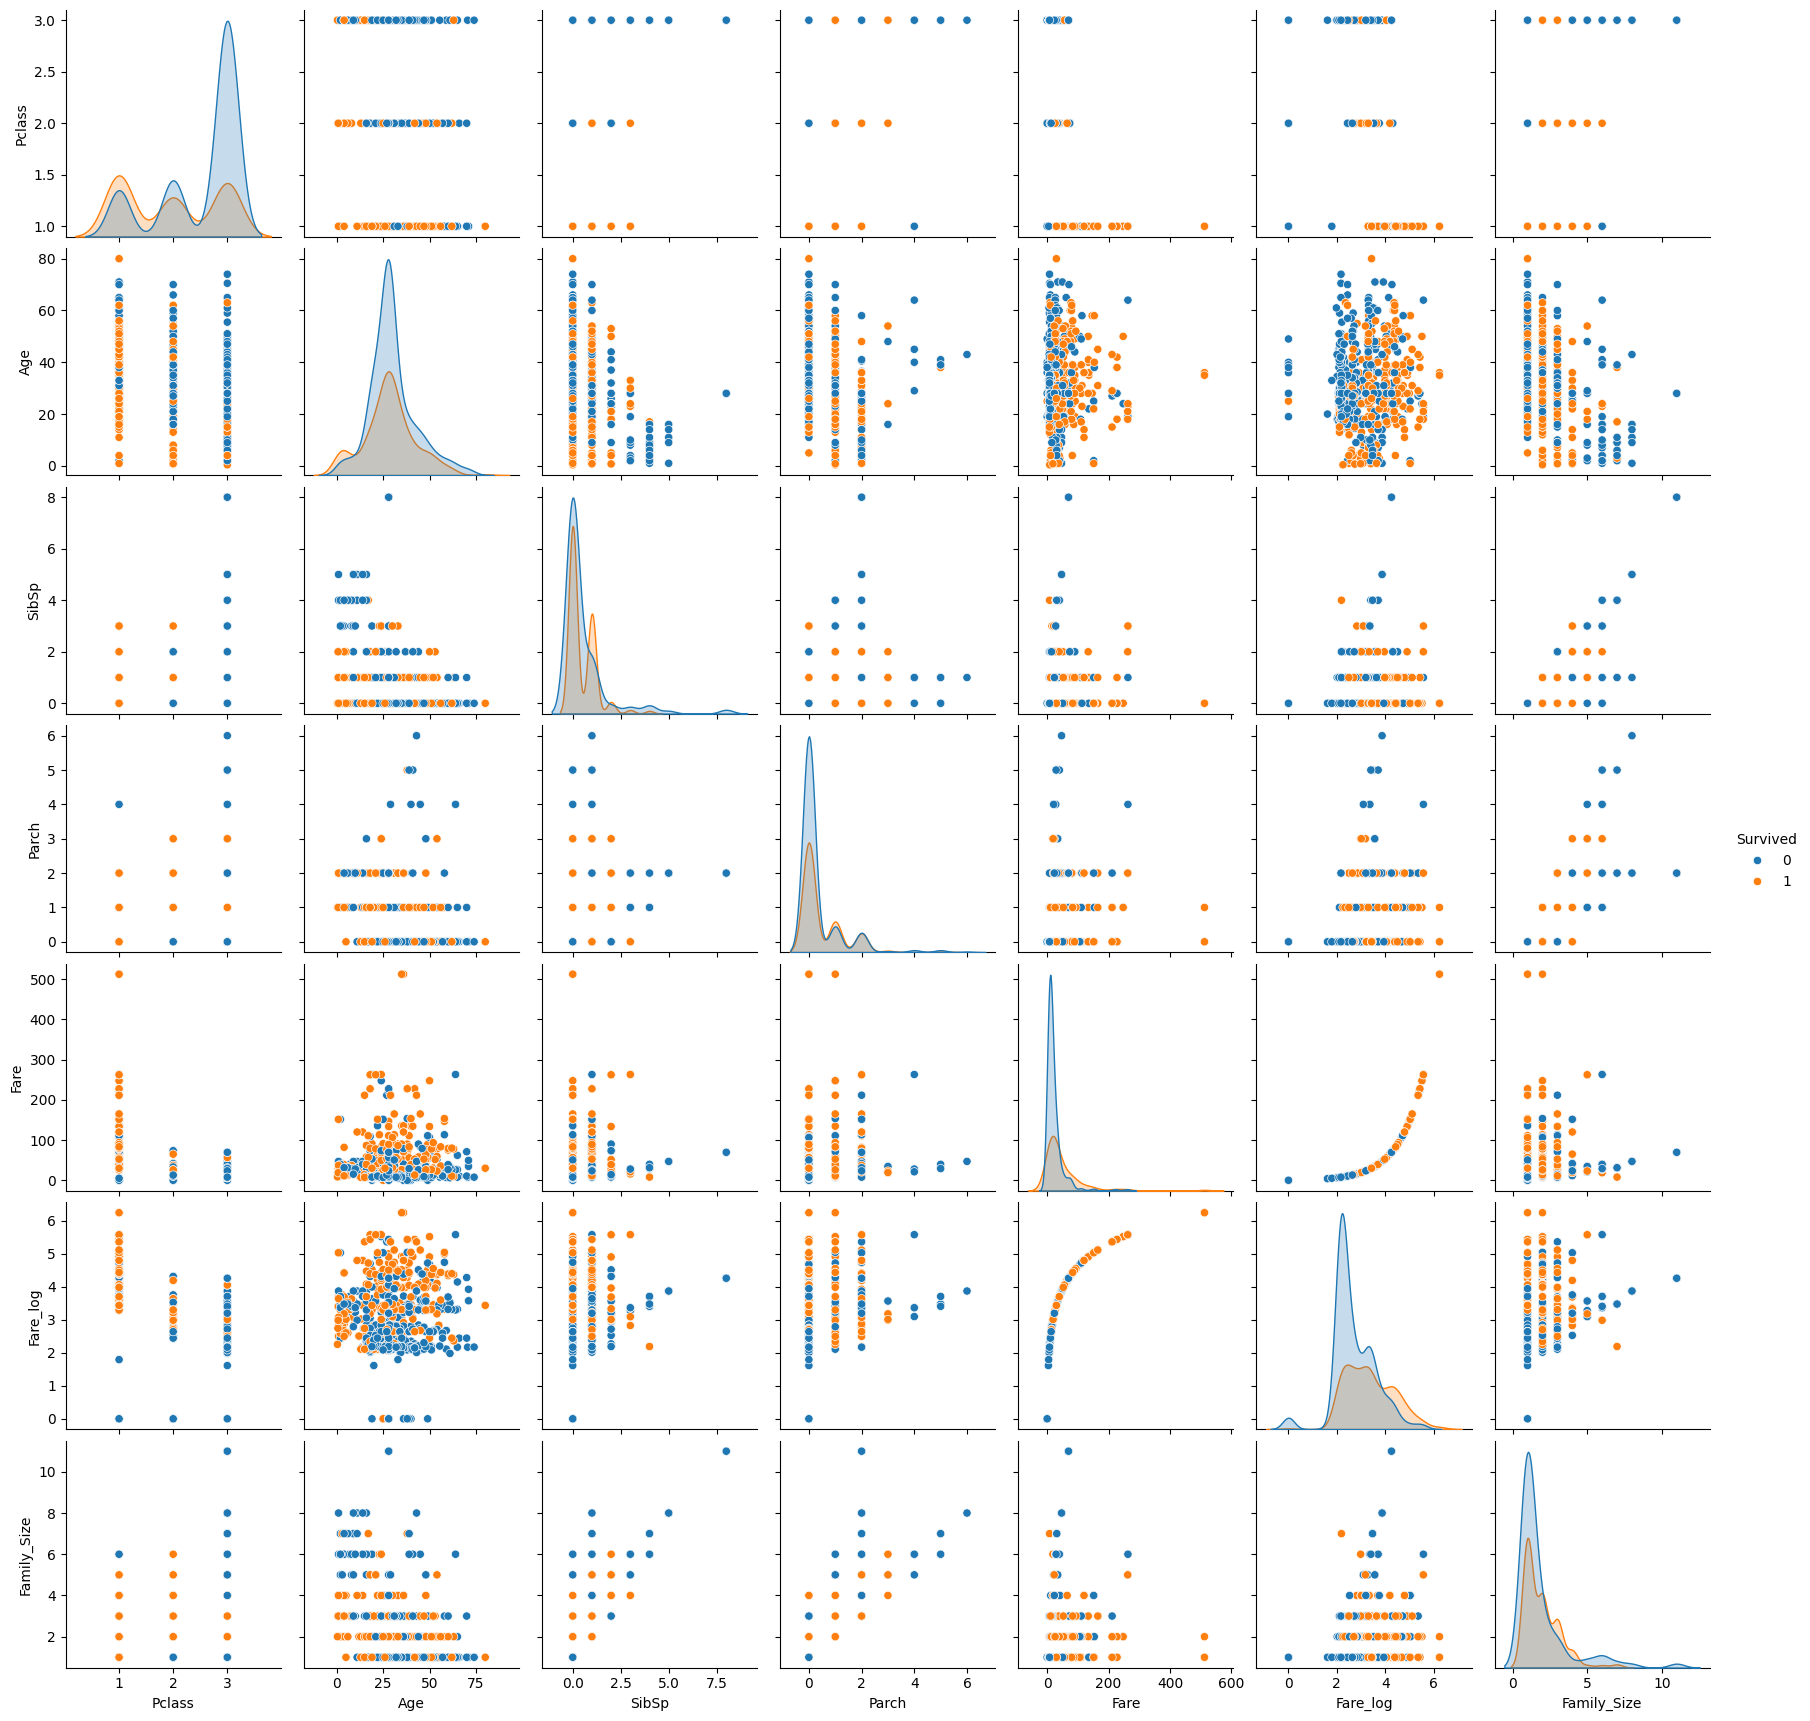

In [25]:
sns.pairplot(train_df, hue='Survived')

### Hypothesis Testing (Optional)
1. Chi-Square test for categorical features (e.g., Sex vs Survived).
2. T-test or ANOVA for numerical differences (e.g., Fare by Pclass).

In [26]:


# Create a contingency table
contingency_table = pd.crosstab(train_df["Sex"], train_df["Survived"])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject Null Hypothesis: There is a significant relationship between Sex and Survival.")
else:
    print("Fail to Reject Null Hypothesis: No significant relationship between Sex and Survival.")


Chi-Square Statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Reject Null Hypothesis: There is a significant relationship between Sex and Survival.


If p < 0.05, survival is not independent of sex (i.e., gender had an impact on survival).

If p > 0.05, survival is independent of sex.


#### T-Test or ANOVA for Numerical Features

In [27]:
# Split Fare data by survival groups
fare_survived = train_df[train_df["Survived"] == 1]["Fare"]
fare_not_survived = train_df[train_df["Survived"] == 0]["Fare"]

# Perform Independent T-Test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Fare differs significantly between survivors and non-survivors.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in Fare.")


T-Statistic: 6.839099259085254
P-value: 2.6993323503141236e-11
Reject Null Hypothesis: Fare differs significantly between survivors and non-survivors.


In [28]:
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(train_df[train_df["Pclass"] == 1]["Fare"],
                                 train_df[train_df["Pclass"] == 2]["Fare"],
                                 train_df[train_df["Pclass"] == 3]["Fare"])

print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypothesis: Fare significantly differs between passenger classes.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in Fare across classes.")


F-Statistic: 242.34415651744814
P-value: 1.0313763209141171e-84
Reject Null Hypothesis: Fare significantly differs between passenger classes.


If p < 0.05, Fare varies significantly between different Pclass groups.
If p > 0.05, Pclass does not influence Fare.